In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy  import stats
from scipy.stats import zscore

## Import Dataset

In [4]:
df1 = pd.read_csv('dailyActivity_merged.csv')
df1

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


## Data Preprocessing

<b> Handle Missing Values <b>

In [8]:
# Check missing values
missing_values = df1.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [10]:
# Check duplicated rows
duplicated_data = df1.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_data}")

# Drop duplicates if needed
df1 = df1.drop_duplicates()

Number of duplicated rows: 0


## Handling Outliers

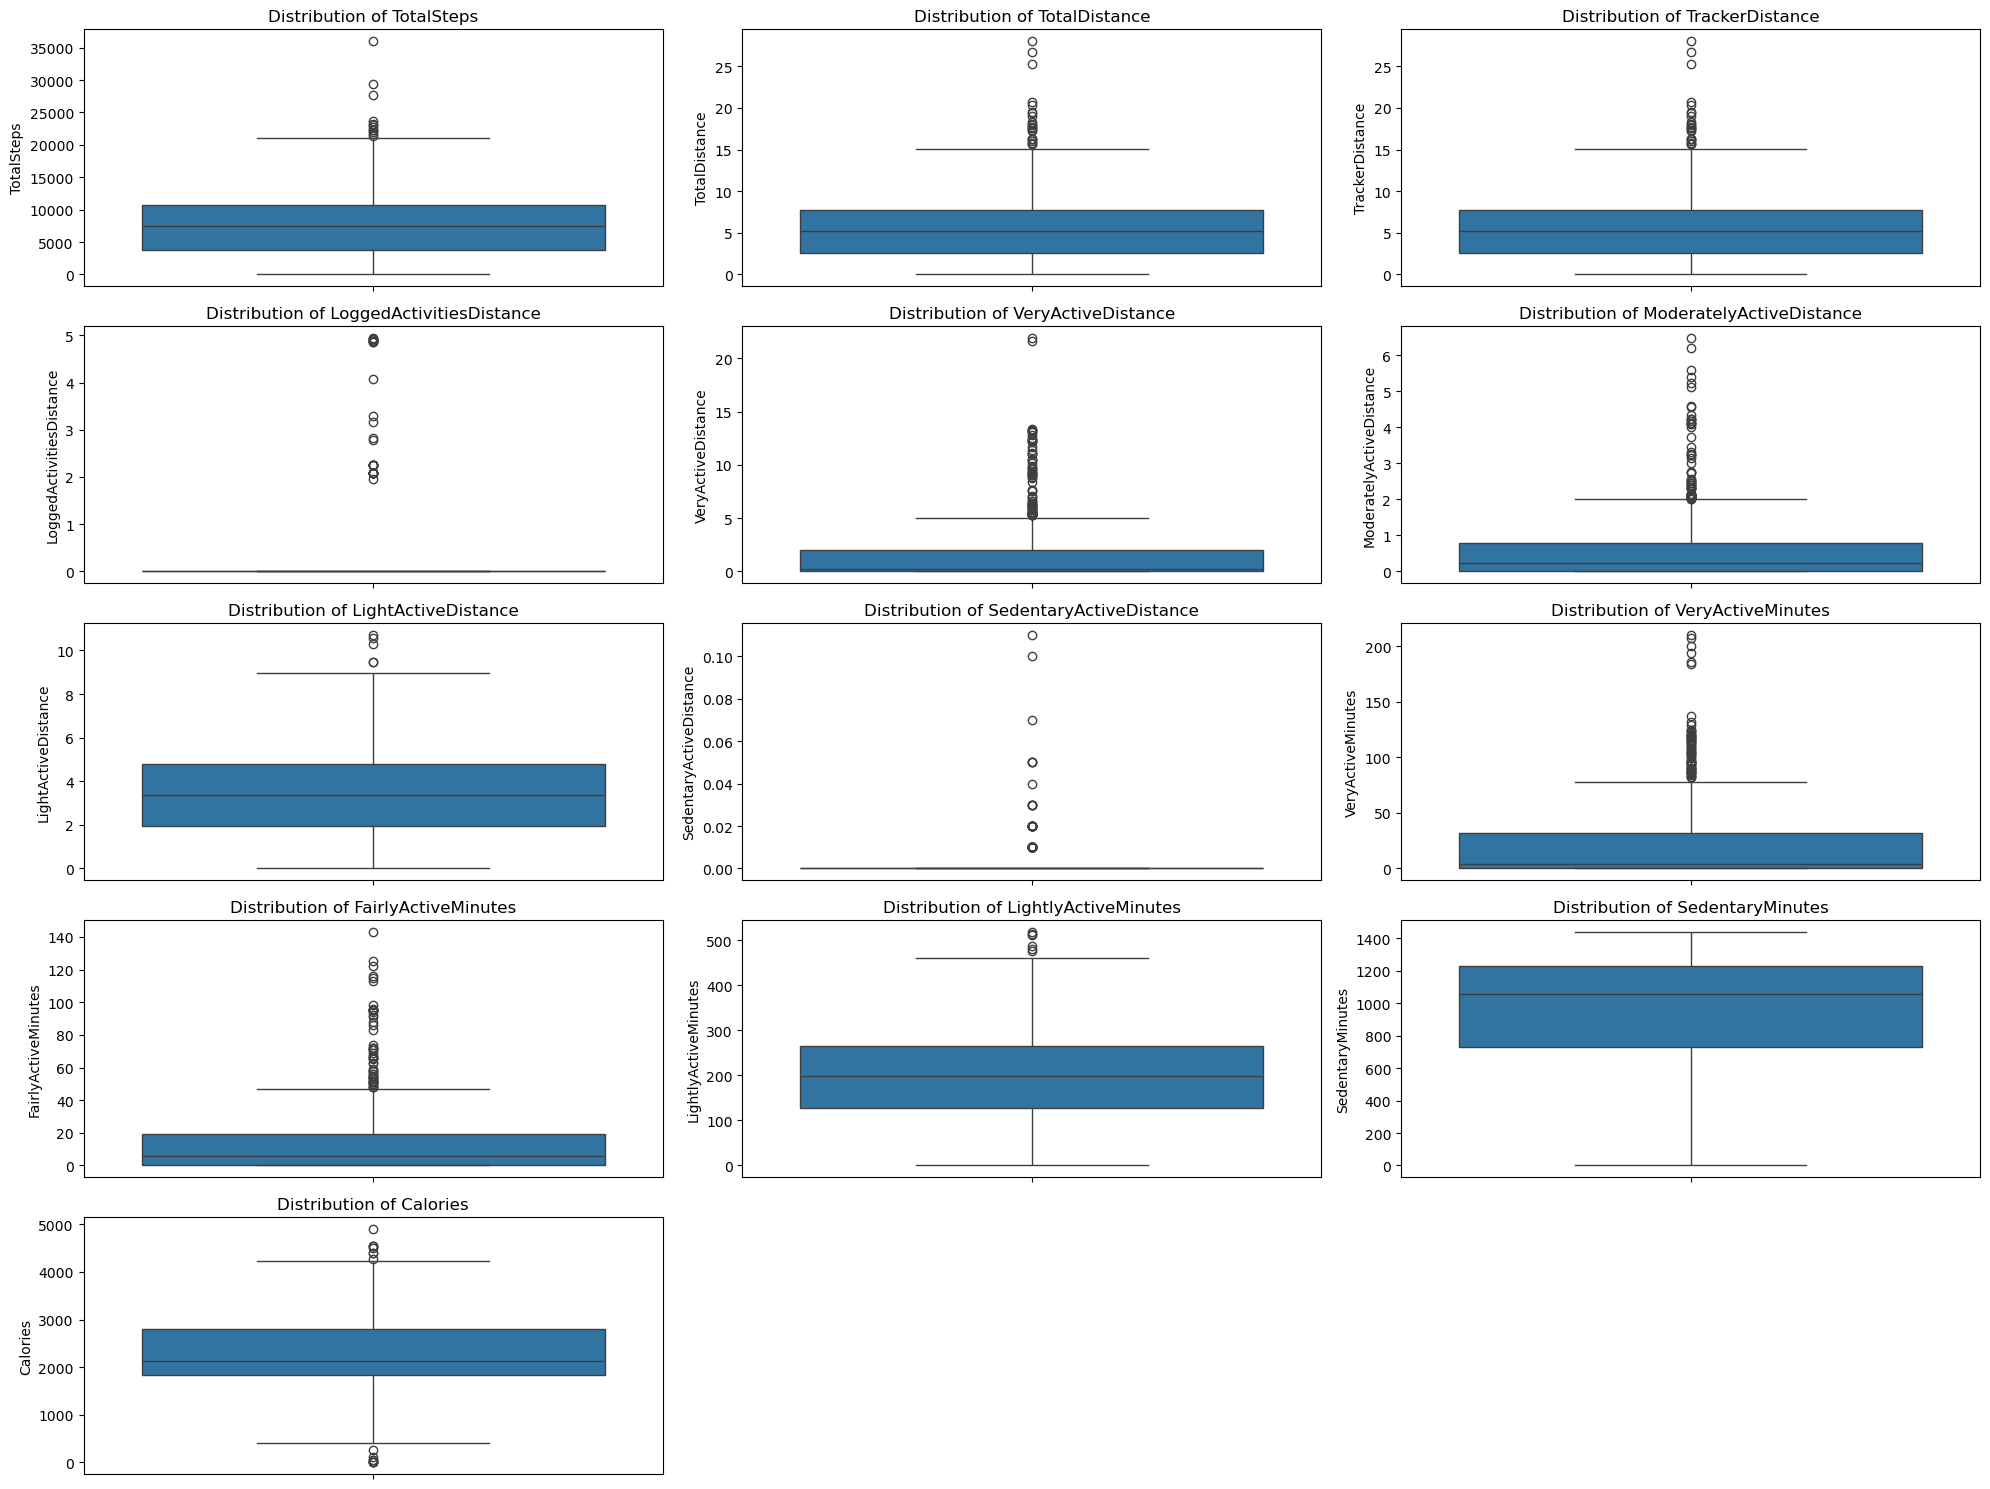

In [13]:
numerics = [
    'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 
    'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 
    'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 
    'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'
]

# Plot distribusi setiap kolom untuk melihat adanya outlier
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerics, 1):
    plt.subplot(5, 3, i)  # Menampilkan 5 baris dan 3 kolom plot
    sns.boxplot(df1[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [14]:
# Handling outliers dengan z-score
dfo = df1.copy() # dataset setelah z-score

for num in numerics:
    z_scores = np.abs(stats.zscore(dfo[num]))
    dfo = dfo[(z_scores <= 3)]

print(f'Dataset sebelum handling outliers {df1.shape}')
print(f'Dataset setelah handling outliers{dfo.shape}')

Dataset sebelum handling outliers (940, 15)
Dataset setelah handling outliers(776, 15)


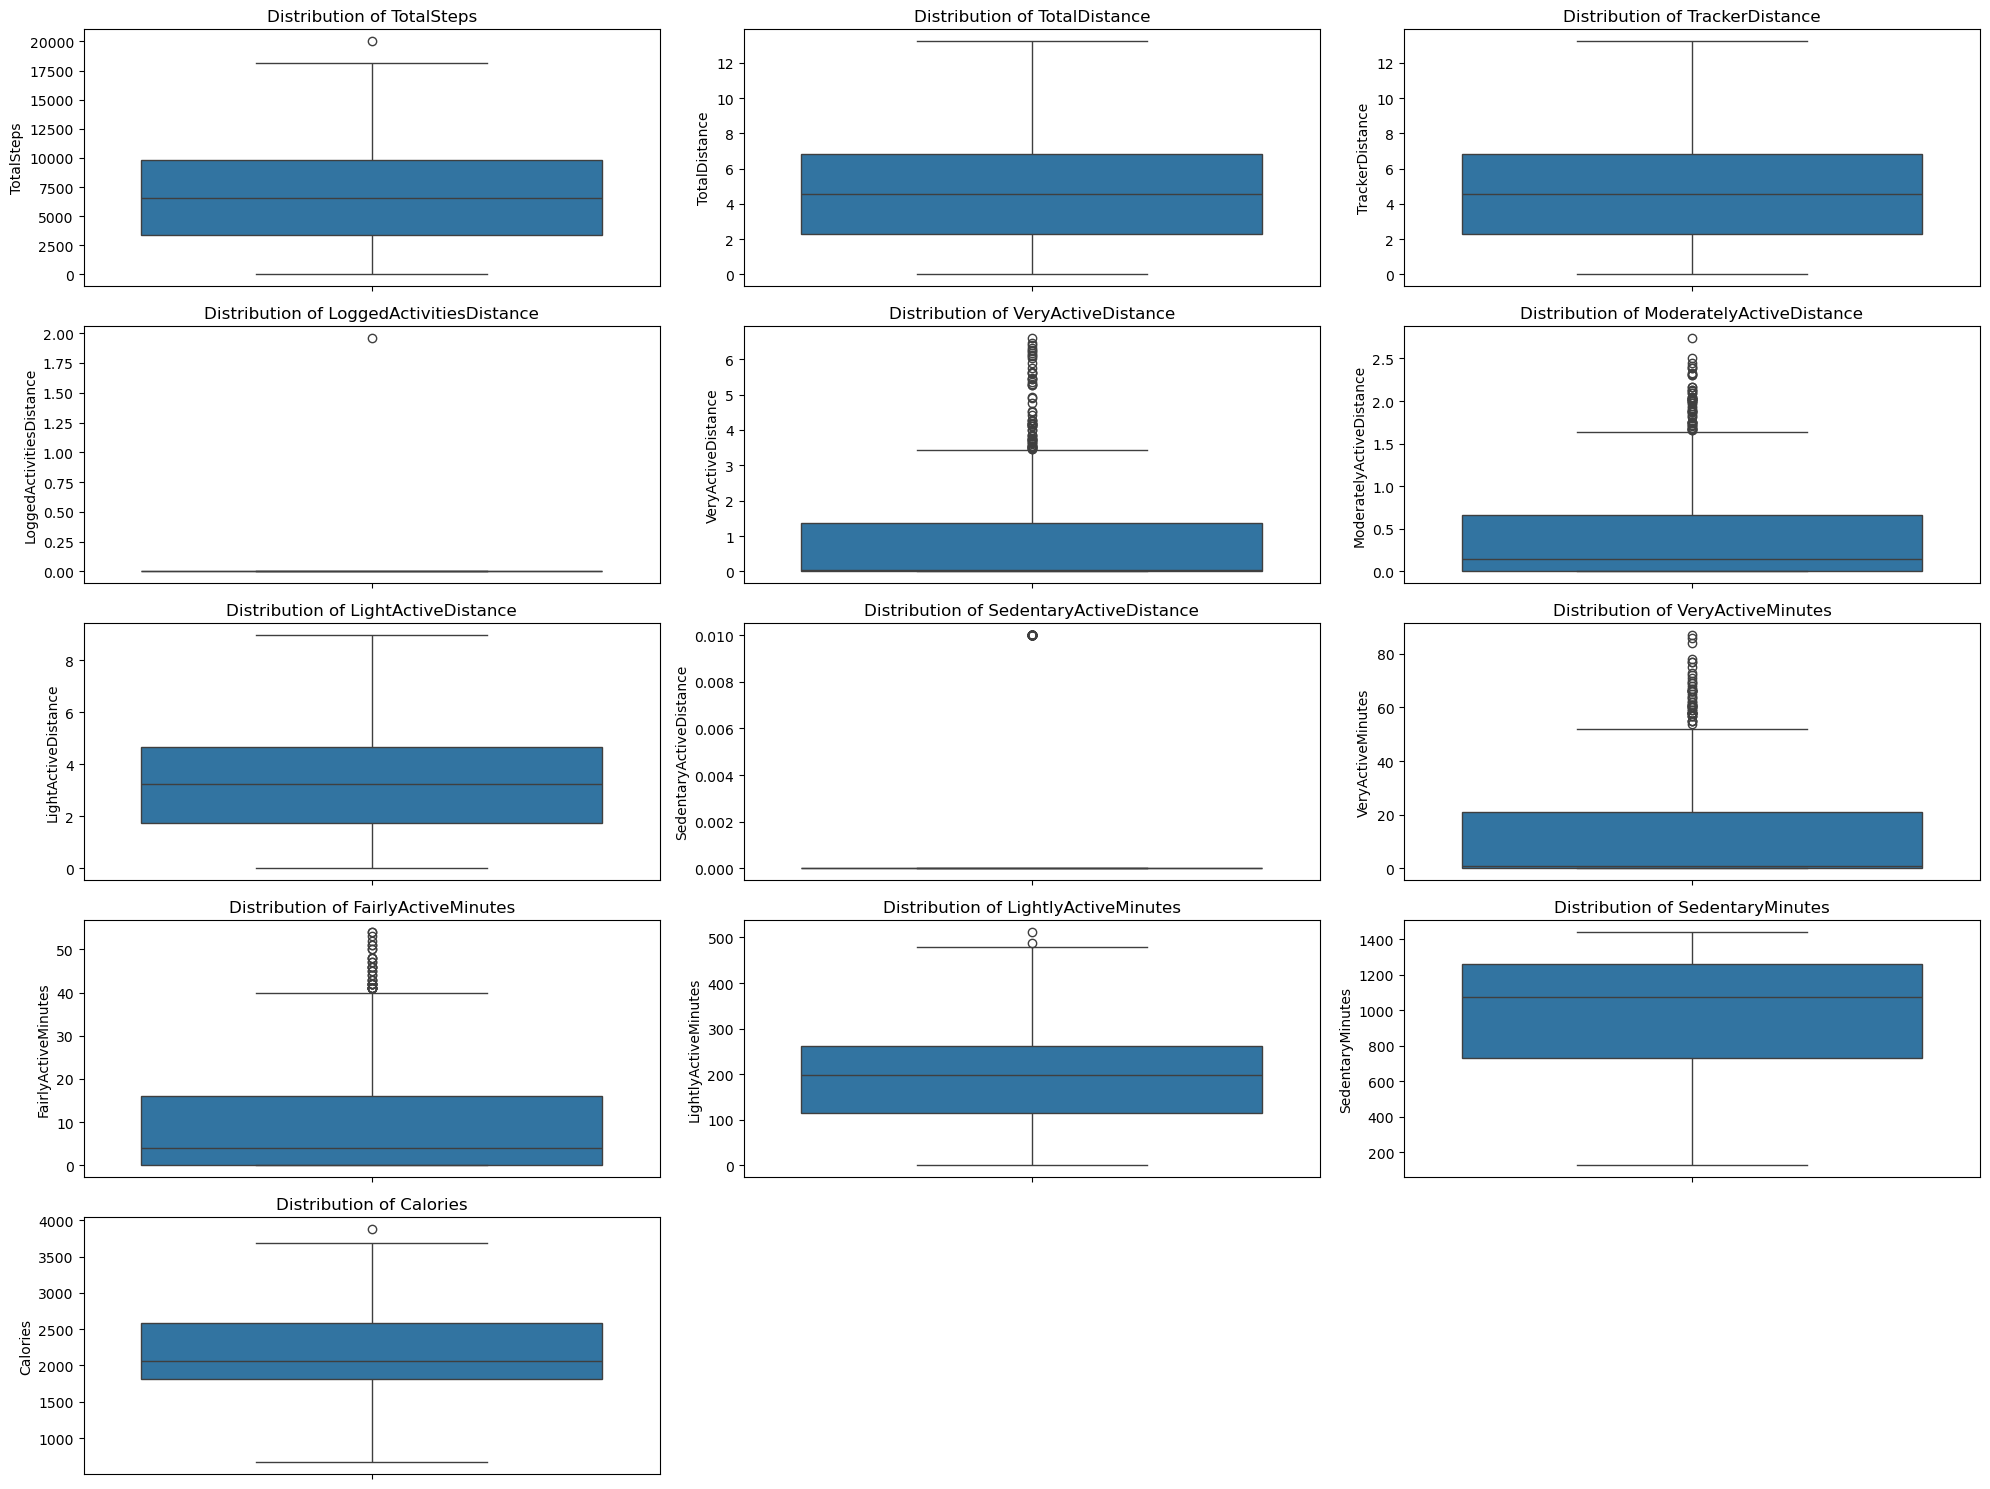

In [15]:
# boxplot setelah z-score
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerics, 1):
    plt.subplot(5, 3, i)  # Menampilkan 5 baris dan 3 kolom plot
    sns.boxplot(dfo[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [16]:
# Convert 'ActivityDate' to datetime format for time-based analysis
dfo['ActivityDate'] = pd.to_datetime(dfo['ActivityDate'])

## Feature Engineering

<b> Feature Selection <b>

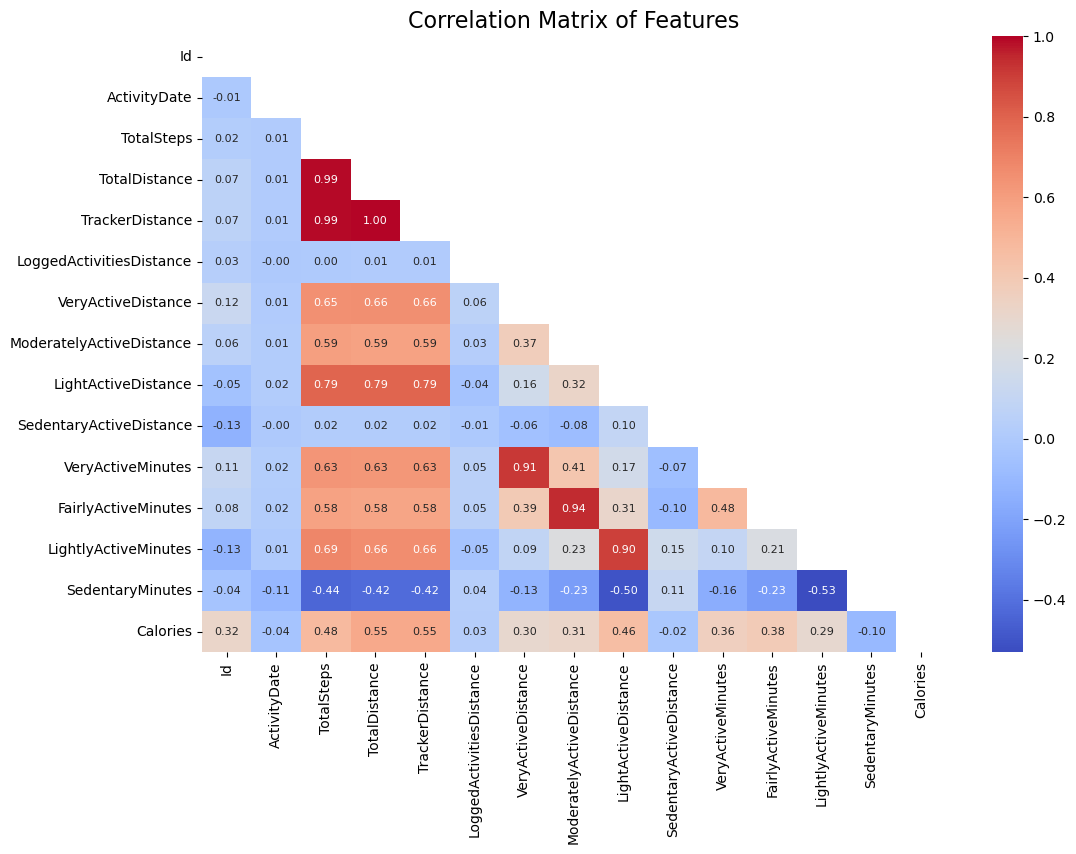

In [19]:
plt.figure(figsize=(12, 8))
correlation_matrix = dfo.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8})

plt.title('Correlation Matrix of Features', fontsize=16)

plt.show()

<b> Melakukan drop terhadap kolom yang kurang relate <b>

In [21]:
df_selected = dfo.drop(columns=['Id','ActivityDate','TrackerDistance', 'LoggedActivitiesDistance'])

# ID karena tidak diperlukan kolom ID dalam proses selanjutnya
# ActivityDate karena tidak diperlukan kolom ID dalam proses selanjutnya
# TrackerDistance karena memiliki nilai korelasi yang sama dengan TotalDistance
# LoggedActivitiesDistance karena memiliki nilai korelasi yang kecil dengan feature lainnya

print("Dropped features: 'TrackerDistance', 'LoggedActivitiesDistance'")

Dropped features: 'TrackerDistance', 'LoggedActivitiesDistance'


## Feature Extraction

<b> Membuat kolom baru yaitu pembagian kelompok berdasarkan total langkah harian <b><br>

Berdasarkan jurnal Revisiting "How Many Steps Are Enough?" oleh TUDOR-LOCKE, CATRINE1; HATANO, YOSHIRO3; PANGRAZI, ROBERT P.2; KANG, MINSOO4.

Diketahui dalam jurnal tersebut, pembagian langkah (steps) seringkali dikategorikan berdasarkan total langkah yang diambil dalam sehari. Berikut adalah pembagian umum yang sering digunakan berdasarkan total langkah:

Sedentary (Tidak Aktif): 0 - 4999 langkah <br>
Low Active (Aktif Rendah): 5000 - 7499 langkah <br>
Somewhat Active (Aktif Sedang): 7500 - 9999 langkah <br>
Active (Aktif): 10,000 - 12,499 langkah <br>
Highly Active (Sangat Aktif): 12,500 langkah ke atas

Pembagian ini membantu dalam memahami tingkat aktivitas fisik individu dan dapat digunakan untuk menetapkan tujuan aktivitas sehari-hari.

Maka akan dilakukan penambahan kolom tingkat aktif tidaknya berdasarkan total steps yang telah ditempuh pada hari tersebut

In [26]:
def categorize_steps(steps):
    if steps < 5000:
        return 'Sedentary'
    elif 5000 <= steps < 7500:
        return 'Low Active'
    elif 7500 <= steps < 10000:
        return 'Somewhat Active'
    elif 10000 <= steps < 12500:
        return 'Active'
    else:
        return 'Highly Active'

group_order = ['Highly Active','Active','Somewhat Active','Low Active','Sedentary']
df_selected ['ActiveGroup'] = df_selected['TotalSteps'].apply(categorize_steps)
df_selected ['ActiveGroup'] = pd.Categorical(df_selected['ActiveGroup'], categories=group_order, ordered=True)
df_selected

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveGroup
0,13162,8.50,1.88,0.55,6.06,0.00,25,13,328,728,1985,Highly Active
1,10735,6.97,1.57,0.69,4.71,0.00,21,19,217,776,1797,Active
2,10460,6.74,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Active
3,9762,6.28,2.14,1.26,2.83,0.00,29,34,209,726,1745,Somewhat Active
4,12669,8.16,2.71,0.41,5.04,0.00,36,10,221,773,1863,Highly Active
...,...,...,...,...,...,...,...,...,...,...,...,...
930,10818,8.21,1.39,0.10,6.67,0.01,19,3,229,1189,2817,Active
932,14055,10.67,5.46,0.82,4.37,0.00,67,15,188,1170,3052,Highly Active
935,10686,8.11,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Active
937,10733,8.15,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Active


<b> Membuat kolom TotalMinutes <b>

In [28]:
df_selected ['TotalMinutes'] = df_selected['VeryActiveMinutes'] + df_selected['FairlyActiveMinutes'] + df_selected['LightlyActiveMinutes'] + df_selected['SedentaryMinutes']

<b> Membuat kolom ratio VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, dan SedentaryMinutes <b>

In [30]:
# Step Intensity Ratios
df_selected['VeryActiveRatio'] = df_selected['VeryActiveMinutes'] / df_selected ['TotalMinutes']
df_selected['FairlyActiveRatio'] = df_selected['FairlyActiveMinutes'] / df_selected ['TotalMinutes']
df_selected['LightlyActiveRatio'] = df_selected['LightlyActiveMinutes'] / df_selected ['TotalMinutes']
df_selected['SedentaryRatio'] = df_selected['SedentaryMinutes'] / df_selected ['TotalMinutes']
df_selected

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveGroup,TotalMinutes,VeryActiveRatio,FairlyActiveRatio,LightlyActiveRatio,SedentaryRatio
0,13162,8.50,1.88,0.55,6.06,0.00,25,13,328,728,1985,Highly Active,1094,0.022852,0.011883,0.299817,0.665448
1,10735,6.97,1.57,0.69,4.71,0.00,21,19,217,776,1797,Active,1033,0.020329,0.018393,0.210068,0.751210
2,10460,6.74,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Active,1440,0.020833,0.007639,0.125694,0.845833
3,9762,6.28,2.14,1.26,2.83,0.00,29,34,209,726,1745,Somewhat Active,998,0.029058,0.034068,0.209419,0.727455
4,12669,8.16,2.71,0.41,5.04,0.00,36,10,221,773,1863,Highly Active,1040,0.034615,0.009615,0.212500,0.743269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,10818,8.21,1.39,0.10,6.67,0.01,19,3,229,1189,2817,Active,1440,0.013194,0.002083,0.159028,0.825694
932,14055,10.67,5.46,0.82,4.37,0.00,67,15,188,1170,3052,Highly Active,1440,0.046528,0.010417,0.130556,0.812500
935,10686,8.11,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Active,1440,0.011806,0.002778,0.170139,0.815278
937,10733,8.15,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Active,1440,0.012500,0.007639,0.155556,0.824306


<b> Menghitung calories per step <b>

In [32]:
# Calories per Step
df_selected['CaloriesPerStep'] = df_selected['Calories'] / df_selected['TotalSteps']
df_selected

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveGroup,TotalMinutes,VeryActiveRatio,FairlyActiveRatio,LightlyActiveRatio,SedentaryRatio,CaloriesPerStep
0,13162,8.50,1.88,0.55,6.06,0.00,25,13,328,728,1985,Highly Active,1094,0.022852,0.011883,0.299817,0.665448,0.150813
1,10735,6.97,1.57,0.69,4.71,0.00,21,19,217,776,1797,Active,1033,0.020329,0.018393,0.210068,0.751210,0.167396
2,10460,6.74,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Active,1440,0.020833,0.007639,0.125694,0.845833,0.169790
3,9762,6.28,2.14,1.26,2.83,0.00,29,34,209,726,1745,Somewhat Active,998,0.029058,0.034068,0.209419,0.727455,0.178754
4,12669,8.16,2.71,0.41,5.04,0.00,36,10,221,773,1863,Highly Active,1040,0.034615,0.009615,0.212500,0.743269,0.147052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,10818,8.21,1.39,0.10,6.67,0.01,19,3,229,1189,2817,Active,1440,0.013194,0.002083,0.159028,0.825694,0.260399
932,14055,10.67,5.46,0.82,4.37,0.00,67,15,188,1170,3052,Highly Active,1440,0.046528,0.010417,0.130556,0.812500,0.217147
935,10686,8.11,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Active,1440,0.011806,0.002778,0.170139,0.815278,0.266423
937,10733,8.15,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Active,1440,0.012500,0.007639,0.155556,0.824306,0.263859
